In [1]:
import nfl_utils as nfl

In [3]:
import numpy as np
import pandas as pd

import os
import json
import requests
from bs4 import BeautifulSoup as soup
import random

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

In [5]:
# unique game ids in data
def unique_game_id(data):
    game_ids = data.game_id.unique()
    return game_ids

# games = unique_game_id(data)
# games

def select_game(data, method='random'):
    game_ids = unique_game_id(data)
    return random.choice(game_ids)

# gid1 = select_game(data, 'random')

def get_game_data(data, game_id='random'):
    if game_id == 'random':
        game_id = select_game(data, 'random')
    game_data = data[data['game_id']==game_id].sort_values(by='play_id')
    return game_data

# g1 = get_game_data(data, 'random')
# g1.head()



In [6]:
def start(year=2021):
    #load a year
    data = nfl.load_data(year)
    # load a game
    g1 = get_game_data(data, game_id='random')
    g1.head()
    return data, g1


In [26]:
data, g1 = start()
data.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652


In [13]:
# view QBs 
g1
cols = ['passer_player_id', 'passer_player_name']
g1[cols]

NameError: name 'unique' is not defined

In [17]:
g1[cols[0]].unique()
g1[cols[1]].unique()


array([nan, 'T.Huntley', 'J.Fields', 'A.Dalton'], dtype=object)

In [24]:
#group by passer name, sum passing yards, including for nan
g1.groupby(cols[1])['passing_yards'].sum()
g1.groupby(g1.passer_player_name.fillna('NaN'))['passing_yards'].sum().reset_index()

,passer_player_name,passing_yards
0,A.Dalton,201.0
1,J.Fields,79.0
2,NaN,0.0
3,T.Huntley,219.0


In [20]:
g1[cols].apply(lambda x: x.unique())

,passer_player_id,passer_player_name
0,NaN,NaN
1,00-0035993,T.Huntley
2,00-0036945,J.Fields
3,00-0027973,A.Dalton


In [35]:
# do for whole season
df = data.copy()
passing_yards = df.groupby(df.passer_player_name.fillna('NaN'))['passing_yards'].sum().reset_index()
passing_yards[passing_yards['passer_player_name']=='NaN'] # equal 0
passing_yards = passing_yards.sort_values(by='passing_yards', ascending=False)

,passer_player_name,passing_yards
92,M.Stafford,6074.0
112,T.Brady,5916.0
99,P.Mahomes,5896.0
53,J.Burrow,5716.0
33,D.Carr,5114.0
...,...,...
14,B.Zylstra,0.0
9,B.Gillikin,0.0
97,NaN,0.0
13,B.Rypien,0.0


c:\Users\Chill\miniconda3\envs\env1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chill\miniconda3\envs\env1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='passing_yards', ylabel='Count'>

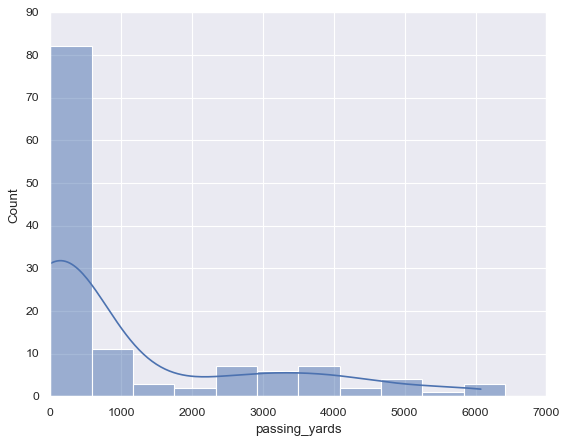

In [42]:
sns.histplot(data=passing_yards, 
             x="passing_yards",
             kde=True,
             binrange=(0, 7000),
             )

In [43]:
#group by play_type
c1 = 'play_type'
g1.groupby(c1)['epa'].sum()

play_type
extra_point     0.307029
field_goal      2.946201
kickoff        -1.194037
no_play        -0.529857
pass           11.768252
punt           -1.521553
qb_kneel        0.000000
qb_spike        0.202517
run           -13.604572
Name: epa, dtype: float64

In [55]:
df.groupby(c1)['epa'].sum()
r1 = df.groupby('passer')['epa'].sum().reset_index()
r1 = r1.sort_values(by='epa', ascending=False)
r1

,passer,epa
96,P.Mahomes,214.542983
90,M.Stafford,183.830946
50,J.Allen,172.131192
109,T.Brady,151.116435
3,A.Rodgers,148.645317
...,...,...
37,D.Mills,-46.041563
117,T.Lawrence,-46.985714
103,S.Darnold,-60.963846
123,Z.Wilson,-67.866826


In [56]:
r1

,passer,epa
96,P.Mahomes,214.542983
90,M.Stafford,183.830946
50,J.Allen,172.131192
109,T.Brady,151.116435
3,A.Rodgers,148.645317
...,...,...
37,D.Mills,-46.041563
117,T.Lawrence,-46.985714
103,S.Darnold,-60.963846
123,Z.Wilson,-67.866826


c:\Users\Chill\miniconda3\envs\env1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chill\miniconda3\envs\env1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chill\miniconda3\envs\env1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


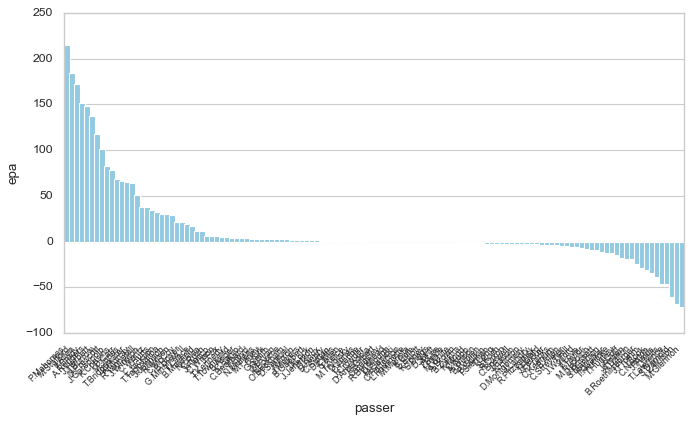

In [57]:
# VERTICAL BAR PLOT

import seaborn as sns
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
# Draw a nested barplot by species and sex
# g = sns.catplot(
bar_color = "skyblue"
g = sns.barplot(x="passer", y="epa", data=r1, 
                 errorbar=None, 
                #  palette="Blues", 
                 saturation=0.8, 
                 color='skyblue',
                 width=1.3,
                 dodge=True)

# g.despine(left=True)
# g.set_axis_labels("QB", "Yards gained")
g.set_xticklabels(g.get_xticklabels(), 
                  rotation=45,
                  horizontalalignment="right", 
                #   fontweight='light',
                #   fontsize='x-large',
                  fontsize=8,
                );


In [62]:
merged_df = r1.merge(passing_yards, left_on='passer', right_on='passer_player_name', how='inner')
merged_df

,passer,epa,passer_player_name,passing_yards
0,P.Mahomes,214.542983,P.Mahomes,5896.0
1,M.Stafford,183.830946,M.Stafford,6074.0
2,J.Allen,172.131192,J.Allen,4686.0
3,T.Brady,151.116435,T.Brady,5916.0
4,A.Rodgers,148.645317,A.Rodgers,2446.0
...,...,...,...,...
118,D.Mills,-46.041563,D.Mills,2664.0
119,T.Lawrence,-46.985714,T.Lawrence,3641.0
120,S.Darnold,-60.963846,S.Darnold,2527.0
121,Z.Wilson,-67.866826,Z.Wilson,2334.0


In [67]:
# merged_df = merged_df.drop('passer_player_name', axis=1)
merged_df = merged_df[merged_df.passing_yards > 500]
merged_df = merged_df.sort_values(by='passing_yards', ascending=False)
merged_df

,passer,epa,passing_yards
1,M.Stafford,183.830946,6074.0
3,T.Brady,151.116435,5916.0
0,P.Mahomes,214.542983,5896.0
6,J.Burrow,117.633630,5716.0
10,D.Carr,68.504831,5114.0
5,J.Herbert,137.789431,5014.0
7,D.Prescott,101.399788,4703.0
2,J.Allen,172.131192,4686.0
8,J.Garoppolo,82.621873,4345.0
9,K.Cousins,78.219409,4221.0


c:\Users\Chill\miniconda3\envs\env1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chill\miniconda3\envs\env1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


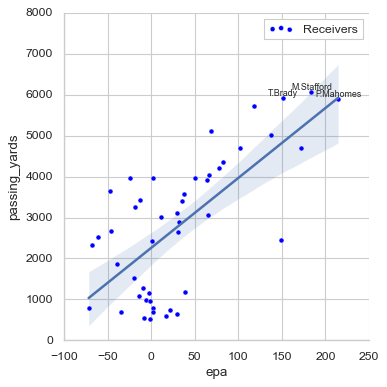

In [88]:
df = merged_df
x= df.epa
# x= 'epa'
# y= g['yard per catch']
y = df.passing_yards
# y = 'passing_yards'
names = df.passer
# names = 'passer'

percentile_threshold = np.percentile(y, 95)


# plot best-fit regression line
sns.lmplot(#x=x, y=y,
            x='epa', 
            y='passing_yards',
            data=df,
            scatter=False)

sns.scatterplot(data=df,
                x=x, y=y, 
                marker='o', color='blue', label='Receivers')


# # Annotate points with labels if they are above the 95th percentile threshold
for i, (xi, yi, name) in enumerate(zip(x, y, names)):
    if yi >= percentile_threshold:
        plt.text(xi, yi, name, fontsize=8, ha='center', va='bottom')


plt.show()


c:\Users\Chill\miniconda3\envs\env1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chill\miniconda3\envs\env1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


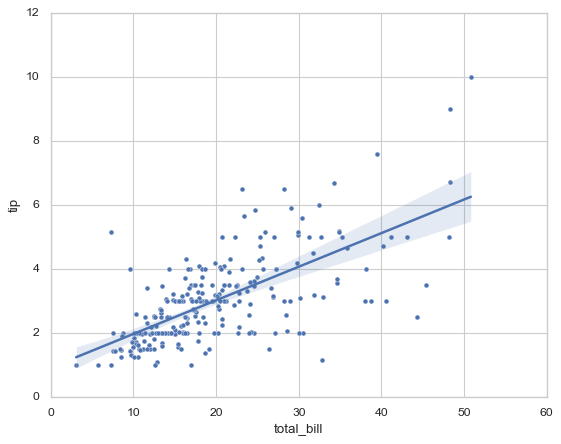

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = sns.load_dataset("tips")

# Create a scatterplot
sns.scatterplot(x="total_bill", y="tip", data=data)

# Overlay a regression line
sns.regplot(x="total_bill", y="tip", data=data, scatter=False)

# Show the plot
plt.show()


In [60]:
import pandas as pd

# Sample DataFrames
data1 = {'col1': [1, 2, 3, 4],
         'value1': ['A', 'B', 'C', 'D']}

data2 = {'col2': [2, 3, 4, 5],
         'value2': ['W', 'X', 'Y', 'Z']}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Merge based on col1 and col2
merged_df = df1.merge(df2, left_on='col1', right_on='col2', how='inner')

print(merged_df)


   col1 value1  col2 value2
0     2      B     2      W
1     3      C     3      X
2     4      D     4      Y


In [21]:
import pandas as pd
import numpy as np

# Sample DataFrame
data = {'col1': ['A', 'B', 'A', 'B', 'A', 'C'],
        'col2': [1, 2, 3, 4, 5, np.nan]}

df = pd.DataFrame(data)

# Group by 'col1' and sum 'col2' while handling NaN values
result = df.groupby('col1')['col2'].agg(['sum', lambda x: x.isna().sum()])

# Rename the columns for clarity
result.columns = ['Sum_col2', 'NaN_count_col1']

print(result)


      Sum_col2  NaN_count_col1
col1                          
A          9.0               0
B          6.0               0
C          0.0               1


In [23]:
import pandas as pd
import numpy as np

# Sample DataFrame with NaN values in col1
data = {'col1': ['A', 'B', 'A', 'B', np.nan, 'C'],
        'col2': [1, 2, 3, 4, 5, 6]}

df = pd.DataFrame(data)

# Group by 'col1' and sum 'col2', including NaN as a separate group
result = df.groupby(df['col1'].fillna('NaN'))['col2'].sum().reset_index()

print(result)


  col1  col2
0    A     4
1    B     6
2    C     6
3  NaN     5
